In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } </style>"))
import numpy as np
np.set_printoptions(linewidth=160)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [3]:
nx=50
ny=50
x=np.linspace(0,1,nx)
y=np.linspace(0,1,ny)
vx,vy=np.meshgrid(x,y)

In [4]:
dx=np.zeros((nx*ny,nx*ny))
dy=np.zeros((nx*ny,nx*ny))
for i in range(nx):
    for j in range(ny):
        if (i>0) and (i<(nx-1)):
#            dx[j*nx+i,j*nx+i-1]=-.5
#            dx[j*nx+i,j*nx+i+1]=.5
            dx[j*nx+i,j*nx+i-1]=-1
            dx[j*nx+i,j*nx+i]=1
        elif (i==0):
            dx[j*nx+i,j*nx+i]=-1.
            dx[j*nx+i,j*nx+i+1]=1.
        else:
            dx[j*nx+i,j*nx+i-1]=-1.
            dx[j*nx+i,j*nx+i]=1.
        if (j>0) and (j<(ny-1)):
#            dy[j*nx+i,(j-1)*nx+i]=-.5
#            dy[j*nx+i,(j+1)*nx+i]=.5
            dy[j*nx+i,(j-1)*nx+i]=-1
            dy[j*nx+i,(j)*nx+i]=1
        elif (j==0):
            dy[j*nx+i,(j)*nx+i]=-1.
            dy[j*nx+i,(j+1)*nx+i]=1.
        else:
            dy[j*nx+i,(j-1)*nx+i]=-1.
            dy[j*nx+i,(j)*nx+i]=1.
            

In [5]:
bnd=vy==0
freenode=np.argwhere((bnd!=True).flatten()).flatten()
bndnode=np.argwhere((bnd.flatten())).flatten()

In [6]:
A=dx*nx+dy*ny

In [18]:
u=np.zeros((nx*ny,1))
bx=vx.reshape((nx*ny,1))[bndnode]
u[bndnode]=(bx+1)*(bx+1)#1+0*bx*bx
f=10*vx.reshape(nx*ny,1)
sol=np.vstack((u[bndnode],np.linalg.solve(A[freenode][:,freenode],f[freenode]-np.matmul(A,u)[freenode])))
vs=sol.reshape(ny,nx)

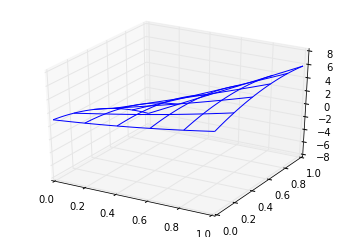

In [19]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, vs,rstride=10,cstride=10)

In [20]:
er=np.matmul(A,sol)-vx.reshape(nx*ny,1)
ve=er.reshape(ny,nx)

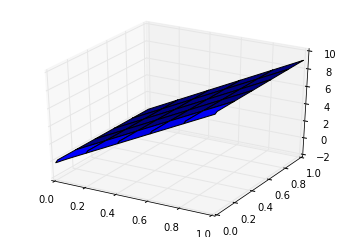

In [21]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(vx, vy, ve)

In [ ]:
%matplotlib inline
plt.plot(vx.reshape(nx*ny,1)[bndnode],u[bndnode])

In [ ]:
dx*nx

In [ ]:
f.reshape(nx,ny)

In [ ]:
vx

In [ ]:
np.matmul((dx*nx),u).T

In [ ]:
np.matmul((dy*ny),u).T

In [ ]:
s.shape

In [ ]:
v